In [60]:
%reload_ext autoreload
%autoreload 2

In [61]:
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import sys

sys.path.append("../../")
from src.model_data_prep import create_outbreak_summary

# Analyze Predictions

In [62]:
PROCESSED_DIR = Path("../../data/03-processed/")
PRED_TESTS = PROCESSED_DIR / "test_dataset_for_analysis.csv"

## Load dataset to analyze

In [63]:
analyze_df = pd.read_csv(PRED_TESTS)
analyze_df = analyze_df.rename(columns={"start_of_week": "Date"})
analyze_df.head()

,Date,CO_AVG_mean,CO_MIN_mean,CO_MAX_mean,CO_STD_mean,WEIGHTED_AVG_CO_mean,HI_AVG_mean,HI_MIN_mean,HI_MAX_mean,HI_STD_mean,...,avg_rad_median_mean,prev_1_wk_numcases,prev_2_wk_numcases,prev_3_wk_numcases,prev_1_mo_numcases,ADM3_PCODE,Cases,actual_class,predicted_class,predicted_proba_outbreak
0,2019-04-01,0.071345,0.067695,0.075829,0.002896,0.071345,29.361429,28.829109,29.965644,0.453012,...,3.300401,0.0,0.0,0.0,0.0,PH097332000,0.0,0,0,0.06
1,2019-04-08,0.064336,0.060724,0.073297,0.004427,0.064336,30.238642,29.598911,30.781683,0.383098,...,3.300401,0.0,0.0,0.0,0.0,PH097332000,0.0,0,0,0.16
2,2019-04-15,0.065662,0.062378,0.067407,0.002146,0.065662,29.963437,29.539703,30.323762,0.292563,...,3.300401,0.0,0.0,0.0,0.0,PH097332000,0.0,0,0,0.18
3,2019-04-22,0.066490,0.064849,0.068458,0.001283,0.066490,31.557666,30.813267,31.924257,0.419398,...,3.300401,0.0,0.0,0.0,0.0,PH097332000,90.0,1,0,0.20
4,2019-04-29,0.062058,0.060388,0.065372,0.001782,0.062058,30.214356,29.596832,30.998020,0.536040,...,3.300401,90.0,0.0,0.0,0.0,PH097332000,0.0,1,1,0.52


In [64]:
analyze_df["Date"] = pd.to_datetime(analyze_df["Date"])

## Visualizing Actual vs. Predicted Outbreaks Periods

In [65]:
actual_outbreaks_summary = create_outbreak_summary(analyze_df, "actual_class")
actual_outbreaks_summary["category"] = "actual"
predicted_outbreaks_summary = create_outbreak_summary(analyze_df, "predicted_class")
predicted_outbreaks_summary["category"] = "predicted"

In [66]:
outbreak_lengths_results = pd.concat(
    [actual_outbreaks_summary, predicted_outbreaks_summary]
)
outbreak_lengths_results

,outbreak_group,start_date,end_date,actual_length_weeks,category
0,1,2019-04-22,2019-05-06,3,actual
1,3,2019-08-19,2019-09-16,5,actual
2,5,2019-10-21,2019-11-04,3,actual
3,7,2019-11-25,2019-12-09,3,actual
0,1,2019-04-29,2019-04-29,1,predicted
1,3,2019-06-17,2019-06-24,2,predicted
2,5,2019-07-08,2019-07-08,1,predicted
3,7,2019-07-22,2019-07-29,2,predicted
4,9,2019-08-19,2019-09-09,4,predicted
5,11,2019-10-28,2019-11-04,2,predicted


In [67]:
# Set custom colors
class_colors = {"predicted": "#ee472f", "actual": "#53bed0"}

# Plot start and end outbreak points
fig = px.scatter(
    outbreak_lengths_results,
    x=["start_date", "end_date"],
    y="category",
    color="category",
    size="actual_length_weeks",
    labels={"x": "Date"},
    category_orders={"category": ["actual", "predicted"]},
    color_discrete_map=class_colors,
)

for i, row in outbreak_lengths_results.iterrows():
    fig.add_trace(
        go.Scatter(
            mode="lines",
            # layer="below",
            line=dict(
                color=class_colors[row["category"]],
                width=3,
                dash="solid",
            ),
            # connect the two markers
            x=[row["start_date"], row["end_date"]],
            y=[row["category"], row["category"]],
            showlegend=False,
        )
    )

# Update layout with title and axis titles
fig.update_layout(
    title="Dengue Outbreak Periods for Zamboanga City",
    xaxis_title="Date",
    yaxis_title="Category",
)
fig.show()

## Visualize actual Number of Cases with Predicted label

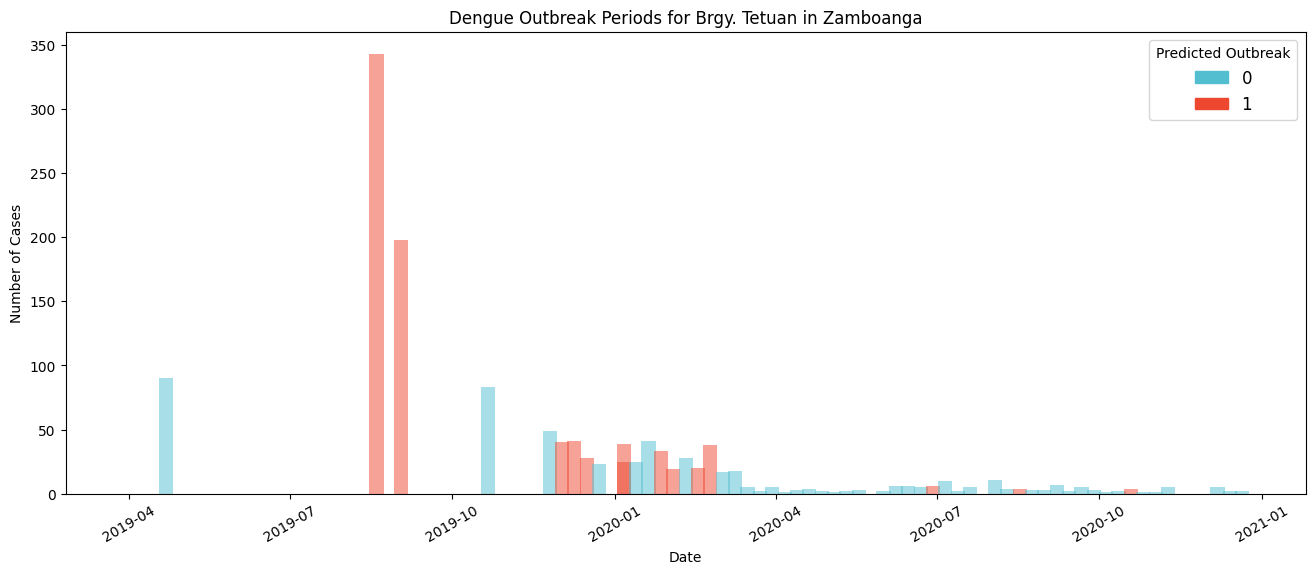

In [68]:
fig, ax = plt.subplots(figsize=(16, 6))


# Define colors for each class
class_colors = {0: "#53bed0", 1: "#ee472f"}

# Plot the bar plot
ax.bar(
    analyze_df["Date"],
    analyze_df["Cases"],
    alpha=0.5,
    label="Bar Plot",
    width=8,
    color=[class_colors[c] for c in analyze_df["predicted_class"]],
)

# # Plot the line plot
# ax.plot(
#     analyze_df["Date"],
#     analyze_df["Cases"],
#     marker="o",
#     color="red",
#     label="Line Plot",
# )

# Rotate x-axis labels
plt.xticks(rotation=30)

# Create legend handles and labels for bar plot
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=color) for color in class_colors.values()
]
legend_labels = list(class_colors.keys())

# Add legend for bar plot
ax.legend(legend_handles, legend_labels, fontsize="large", title="Predicted Outbreak")
# Add title and axis labels
ax.set_title("Dengue Outbreak Periods for Brgy. Tetuan in Zamboanga")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Cases")
plt.show()

In [69]:
analyze_df.dtypes

Date                        datetime64[ns]
CO_AVG_mean                        float64
CO_MIN_mean                        float64
CO_MAX_mean                        float64
CO_STD_mean                        float64
                                 ...      
Cases                              float64
actual_class                         int64
predicted_class                      int64
predicted_proba_outbreak           float64
outbreak_group                       int64
Length: 162, dtype: object

In [70]:
range(len(analyze_df))

range(0, 91)

In [71]:
analyze_df.max()

Date                        2020-12-21 00:00:00
CO_AVG_mean                            0.082631
CO_MIN_mean                            0.078115
CO_MAX_mean                            0.124572
CO_STD_mean                            0.024249
                                   ...         
Cases                                     343.0
actual_class                                  1
predicted_class                               1
predicted_proba_outbreak                   0.88
outbreak_group                               26
Length: 162, dtype: object

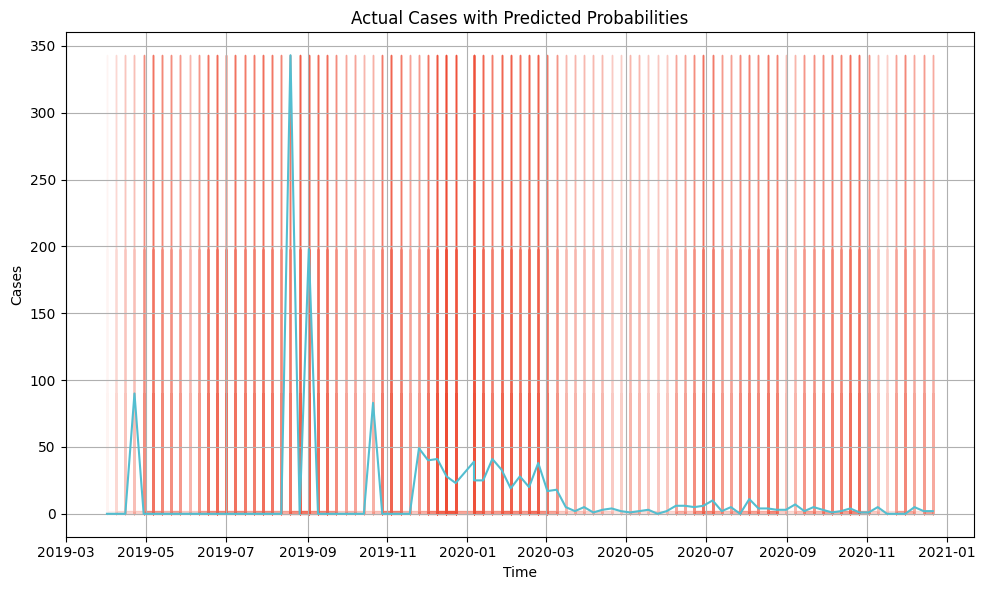

In [120]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plotting the line plot for actual cases
plt.plot(
    analyze_df["Date"],
    analyze_df["Cases"],
    color="#53bed0",
    label="Actual Cases",
)

# Define your own gradient color
gradient_color = "#ee472f"  # Hot pink color

# Creating a background gradient for predicted probabilities
for i in range(len(analyze_df) - 1):
    start_date = analyze_df["Date"].iloc[i]
    end_date = analyze_df["Date"].iloc[i + 1]
    alpha = analyze_df["predicted_proba_outbreak"].iloc[
        i
    ]  # Use predicted probability as alpha
    plt.fill_betweenx(
        analyze_df["Cases"],  # y-values (actual cases)
        start_date,
        end_date,  # x-values (dates)
        color=gradient_color,  # Gradient color
        alpha=alpha,  # Set alpha based on predicted probability
        label=None,  # Exclude from legend
    )

# Setting labels and legend
plt.xlabel("Time")
plt.ylabel("Cases")
plt.title("Actual Cases with Predicted Probabilities")

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

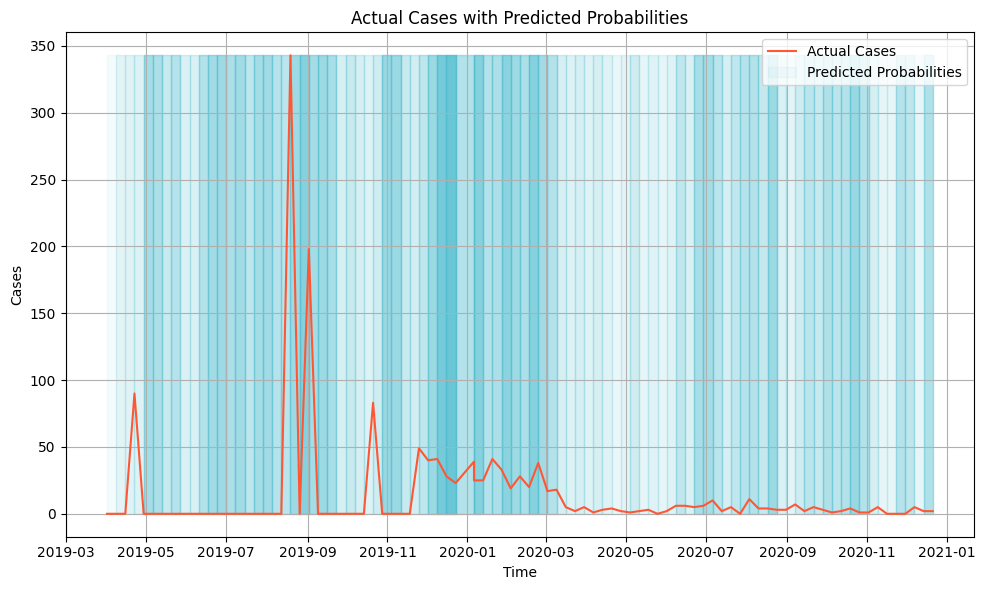

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10, 6))

# Plotting the line plot for actual cases with a different color
plt.plot(
    analyze_df["Date"],
    analyze_df["Cases"],
    color="#ff5733",  # Reddish color for better visibility
    label="Actual Cases",
)

# Define your own gradient color
gradient_color = "#53bed0"  # Blueish color for the gradient

# Define the number of points for the gradient
num_points = len(analyze_df)

# Create a custom colormap with the gradient color
colors = [(0, gradient_color), (1, gradient_color)]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Creating a background gradient for predicted probabilities
for i in range(len(analyze_df) - 1):
    start_date = analyze_df["Date"].iloc[i]
    end_date = analyze_df["Date"].iloc[i + 1]
    alpha = analyze_df["predicted_proba_outbreak"].iloc[
        i
    ]  # Use predicted probability as alpha
    plt.fill_between(
        analyze_df["Date"],  # x-values (dates)
        analyze_df["Cases"].min(),  # Bottom y-value (minimum of actual cases)
        analyze_df["Cases"].max(),  # Top y-value (maximum of actual cases)
        where=(
            (analyze_df["Date"] >= start_date) & (analyze_df["Date"] <= end_date)
        ),  # Condition for filling the area
        color=cmap(i / num_points),  # Use colormap to set gradient color
        alpha=alpha,  # Set alpha based on predicted probability
        label="Predicted Probabilities"
        if i == 0
        else None,  # Include legend only for the first fill_between
    )

# Add legend for the line plot and the gradient
plt.legend()

# Setting labels and title
plt.xlabel("Time")
plt.ylabel("Cases")
plt.title("Actual Cases with Predicted Probabilities")

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualizing length of outbreaks + Predicted probability of an outbreak

In [137]:
# Assuming sample_brgy contains the outbreak period data
class_colors = {"predicted": "#ee472f", "actual": "#53bed0"}


outbreak_actual = outbreak_lengths_results[
    outbreak_lengths_results["category"] == "actual"
]

num_years = analyze_df["Date"].dt.year.nunique()

fig = px.scatter(
    outbreak_actual,
    x=["start_date", "end_date"],
    y=outbreak_actual["start_date"].dt.year,
    color="category",
    size="actual_length_weeks",
    labels={"x": "Date"},
    category_orders={"category": ["actual"]},
    color_discrete_map=class_colors,
)

# Add dumbbell plot lines
for i, row in outbreak_actual.iterrows():
    fig.add_trace(
        go.Scatter(
            mode="lines",
            line=dict(
                color=outbreak_actual["category"].map(class_colors)[i],
                width=3,
                dash="solid",
            ),
            x=[row["start_date"], row["end_date"]],
            y=[row["start_date"].year, row["start_date"].year],
            showlegend=False,
        )
    )

# Multiply opacity based on predicted probability values
opacity = 0.1 + 0.7 * analyze_df["predicted_proba_outbreak"]

# Set constant y-coordinate for the bars
y_bar = []
for year in outbreak_actual["start_date"].dt.year.unique():
    y_bar.extend([year * 2] * len(analyze_df))


# Add probability of outbreak plot as a background
fig.add_trace(
    go.Bar(
        x=analyze_df["Date"],
        y=y_bar,
        marker=dict(
            color="pink", opacity=opacity, line=dict(color="rgba(0,0,0,0.2)", width=0.5)
        ),
        hoverinfo="text",
        text=[f"{prob:.2f}" for prob in analyze_df["predicted_proba_outbreak"]],
        showlegend=False,
    )
)

# Update layout with title and axis titles
fig.update_layout(
    title="Dengue Outbreak Periods for Zamboanga City with Probability of Outbreak",
    xaxis_title="Date",
    yaxis_title="Year",
    bargap=0,  # Remove gaps between bars
    barmode="overlay",  # Overlay the dumbbell plot
    yaxis=dict(
        tickvals=y_bar,  # Set y-tick values to the years
        ticktext=[
            f"{year}" for year in outbreak_actual["start_date"].dt.year.unique()
        ],  # Set y-tick labels to the year
    ),
)

fig.show()